In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Following steps mentioned in https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a  

In [7]:

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/AIML/Capstone"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive


In [8]:
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

100% 1.82G/1.83G [01:00<00:00, 35.0MB/s]
100% 1.83G/1.83G [01:00<00:00, 32.4MB/s]


In [9]:
!ls

drive  sample_data  stanford-car-dataset-by-classes-folder.zip


In [12]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [11]:
import tensorflow
tensorflow.__version__

'2.4.1'

In [13]:
import os
os.chdir('/content/car_data/car_data')
path = '.'

In [14]:
pwd

'/content/car_data/car_data'

In [15]:
ls

test/  train/


In [17]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('./train/')

## Define function to load image
###Define a function to load image from the metadata

In [23]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [19]:
original  = os.listdir('./train/')

In [20]:
print(original)

['Honda Accord Sedan 2012', 'AM General Hummer SUV 2000', 'Daewoo Nubira Wagon 2002', 'Honda Accord Coupe 2012', 'Chrysler Crossfire Convertible 2008', 'Audi 100 Wagon 1994', 'Chevrolet Corvette ZR1 2012', 'Buick Enclave SUV 2012', 'Ford F-150 Regular Cab 2007', 'Hyundai Azera Sedan 2012', 'BMW 3 Series Wagon 2012', 'Rolls-Royce Ghost Sedan 2012', 'Chevrolet Tahoe Hybrid SUV 2012', 'Chevrolet Sonic Sedan 2012', 'Chrysler Town and Country Minivan 2012', 'smart fortwo Convertible 2012', 'Hyundai Elantra Touring Hatchback 2012', 'Aston Martin V8 Vantage Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012', 'Dodge Caliber Wagon 2012', 'Mercedes-Benz 300-Class Convertible 1993', 'FIAT 500 Abarth 2012', 'Volkswagen Golf Hatchback 2012', 'Audi TTS Coupe 2012', 'Dodge Dakota Crew Cab 2010', 'Aston Martin Virage Coupe 2012', 'Acura TSX Sedan 2012', 'Chevrolet Silverado 1500 Hybrid Crew Cab 2012', 'Land Rover LR2 SUV 2012', 'Ford Fiesta Sedan 2012', 'Spyker C8 Convertible 2009', 'Lamborghini Gallardo LP

(525, 700, 3)


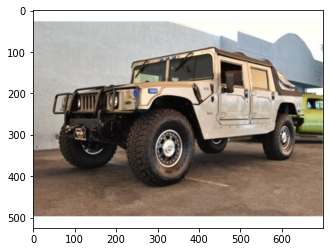

In [24]:
import matplotlib.pyplot as plt
a = './train/AM General Hummer SUV 2000/00163.jpg'
img = cv2.imread(a, 1)
print(img.shape)
plt.imshow(img)

(450, 600, 3)


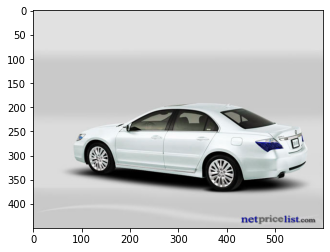

In [25]:
import matplotlib.pyplot as plt
a = './train/Acura RL Sedan 2012/00691.jpg'
img = cv2.imread(a, 1)
print(img.shape)
plt.imshow(img)
